<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%98%D0%9D%D0%94%D0%A3%D0%9A%D0%A2%D0%98%D0%92%D0%9D%D0%AB%D0%99%20%D0%90%D0%9D%D0%90%D0%9B%D0%98%D0%97%3A%20%20%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0%20%D0%B8%20%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%81%D0%BE%D0%B2%D0%BE%D0%BA%D1%83%D0%BF%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C%20%D0%A0%D0%B5%D0%BF%D1%80%D0%B5%D0%B7%D0%B5%D0%BD%D1%82%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C%20%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%2C%20%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B%2C%20P_value%2C%20%D0%9E%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D0%BE%D1%80%D0%BE%D0%BD%D0%BD%D1%8F%D1%8F%20%D0%B8%20%D0%B4%D0%B2%D1%83%D1%81%D1%82%D0%BE%D1%80%D0%BE%D0%BD%D0%BD%D1%8F%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0%20%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ИНДУКТИВНЫЙ АНАЛИЗ**

1.   Выборка и генеральная совокупность
2.   Репрезентативность
3.   Доверительный интервал
4.   Статистические гипотезы
5.   P_value - статистическая значимость
6.   Односторонняя и двусторонняя проверка гипотез



1.   определить Генеральную совокупность
2.   определить Выборку
3.   вычислить  Выборочное среднее
4.   вычислить  Стандартную ошибку
5.   посчитать  Доверительный интревал








In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()


Saving Lesson_5_Score.xlsx to Lesson_5_Score (1).xlsx


In [ ]:
import io
df=pd.read_excel(io.BytesIO(uploaded['Lesson_5_Score (1).xlsx']))

x = df['score'].mean() # Найдем среднее
sd = df['score'].std() # Найдем стандартное отклонение выборки
se = sd / np.sqrt(len(df['score'])) # Вычислим стандартную ошибку

print(x)
print(se)

5.65
0.28118615998241553


**ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ**

95-процентный доверительный интервал строится по формуле
[x - 1.96se; x + 1.96se]

In [ ]:
print(x-1.96*se, x+1.96*se)

5.098875126434466 6.201124873565535


*То есть с вероятностью 95% оценка приложения лежит в интервале от 5.1 до 6.2.*

Для 99-процентного интервала используется формула
[x - 2.58se; x + 2.58se]

In [ ]:
print(x-2.58*se, x+2.58*se)

4.924539707245368 6.375460292754632


*То есть с вероятностью 99% оценка приложения лежит в интервале от 4.9 до 6.4. Обратите внимание, что когда вероятность выросла, ширина интервала увеличилась.*

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Lesson_5_Score_upd.xlsx.csv to Lesson_5_Score_upd.xlsx.csv


In [ ]:
df_new=pd.read_csv(io.BytesIO(uploaded['Lesson_5_Score_upd.xlsx.csv']))

In [ ]:
# Посчитаем среднее и стандартную ошибку
x_new = df_new['score'].mean()
sd_new = df_new['score'].std()
se_new = sd_new / np.sqrt(len(df_new['score']))

# Посчитаем границы доверительного интервала
print(x_new-1.96*se_new, x_new+1.96*se_new)

5.3280795458812475
6.038754624973024

# Сравним длину старого и нового интервала
print((x+1.96*se) - (x-1.96*se))
print((x_new+1.96*se_new)-(x_new-1.96*se_new))

1.1022497471310686
0.7106750790917769
# С увеличением выборки интервал заметно сузился.

5.3280795458812475 6.038754624973024
1.1022497471310686
0.7106750790917769


0.7106750790917769

**СТАТИСТИЧЕСКИЕ ГИПОТЕЗЫ**

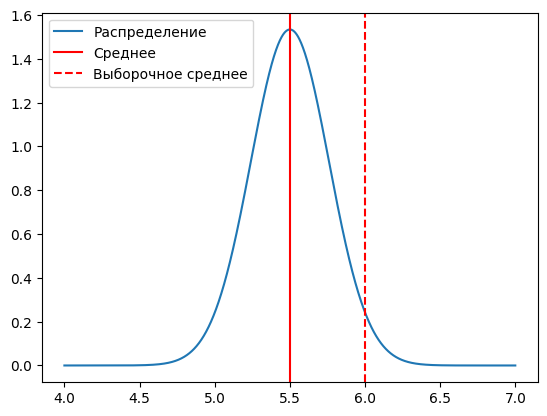

In [ ]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

score = 5.5 # Изначальная оценка
sample_score = 6.0 # Выборочная оценка. Оценка новой версии
sd = 2.6 # Стандартное отклонение выборки
n = 100 # Количество наблюдений

se = sd / np.sqrt(n) # Стандартная ошибка
x = np.arange(4, 7, 0.001) # Значения для оси X от 4 до 6 баллов

plt.plot(x, norm.pdf(x, score, se)) # Построим нормальное распределение выборочных средних
plt.axvline(score, color='r')
plt.axvline(sample_score, color='r', linestyle='--')
plt.legend(['Распределение', 'Среднее', 'Выборочное среднее'])
plt.show()

In [ ]:
p_value = round(1 - norm.cdf(sample_score, score, se), 3)
print('Вероятность получить такую или еще большую оценку: ', p_value)

Вероятность получить такую или еще большую оценку:  0.027


*В результате расчетов мы получили значение 0.027 или 2.7%. Это значит, что именно с этой вероятностью мы получим такую или ещё большую оценку от пользователей при истинности нулевой гипотезы. Полученная вероятность p_value — это статистическая значимость нашего результата, то есть степень уверенности в том, что результат не был получен случайно.
Как видим, вероятность достаточно мала, поэтому отклоняем нулевую гипотезу и принимаем, что обновление нашего приложение действительно понравилось пользователям.*

In [ ]:
alpha = 0.05
p_value = round(1 - norm.cdf(sample_score, score, se), 3)

if p_value < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Отклоняем нулевую гипотезу


**двусторонняя проверка гипотез**

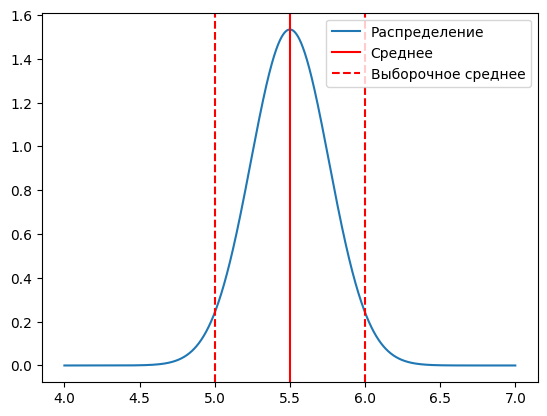

In [ ]:
plt.plot(x, norm.pdf(x, score, se)) # Построим нормальное распределение выборочных средних
plt.axvline(score, color='r')
plt.axvline(sample_score, color='r', linestyle='--')
plt.axvline(sample_score-1, color='r', linestyle='--')
plt.legend(['Распределение', 'Среднее', 'Выборочное среднее'])
plt.show()